In [48]:
# pandas and numpy forcaluclations and formating data 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualzation matplot lib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # to redues fomating each time used
 
# to print in notebook
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data 

# For time stamps
import datetime as dt

In [49]:
tickers = ['GOOG','AMZN','DOW','SPY']
end = dt.date.today()
start = dt.date(end.year-1,end.month,end.day)

In [50]:
for stock in tickers:
    globals()[stock] = data.DataReader(stock,'google',start,end)

In [51]:
DOW.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-30,52.04,52.28,51.79,51.83,6649584
2016-10-03,52.34,52.90,52.14,52.42,7016640
2016-10-04,52.47,52.75,51.74,51.86,6884016
2016-10-05,52.03,53.00,51.98,52.70,6365723
2016-10-06,52.65,53.61,52.38,53.59,8120744


In [52]:
DOW.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2016-09-30 to 2017-08-31
Data columns (total 5 columns):
Open      231 non-null float64
High      231 non-null float64
Low       232 non-null float64
Close     232 non-null float64
Volume    232 non-null int64
dtypes: float64(4), int64(1)
memory usage: 10.9 KB


In [53]:
DOW.describe()

,Open,High,Low,Close,Volume
count,231.000000,231.000000,232.000000,232.000000,2.320000e+02
mean,60.499394,60.944459,60.092457,60.568793,6.060640e+06
std,4.121720,4.143873,4.101735,4.108718,3.442679e+06
min,52.030000,52.280000,51.600000,51.830000,2.106402e+06
25%,57.570000,57.965000,57.152500,57.667500,4.403106e+06
50%,61.820000,62.120000,61.380000,61.890000,5.316754e+06
75%,63.665000,64.100000,63.245000,63.680000,7.028030e+06
max,67.080000,67.500000,66.630000,66.850000,4.380207e+07


In [54]:
To look at later

sns.jointplot(dow_df['Close'],goog_df['Close'],kind='hex')

SyntaxError: invalid syntax (<ipython-input-54-bef0c941c68e>, line 1)

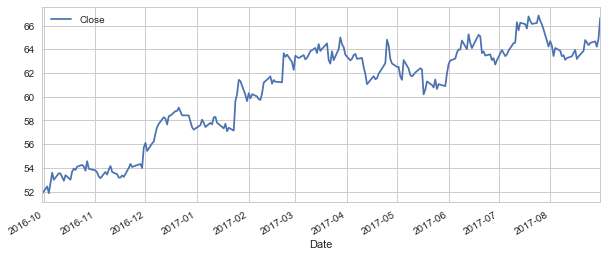

In [55]:
DOW['Close'].plot(legend=True,figsize=(10,4))

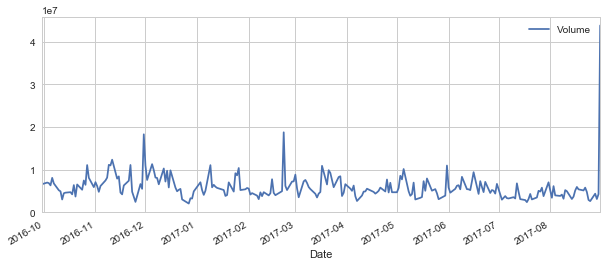

In [56]:
DOW['Volume'].plot(legend=True,figsize=(10,4))

In [57]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    DOW[column_name] = pd.rolling_mean(DOW['Close'],ma) # he used Adj Close

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


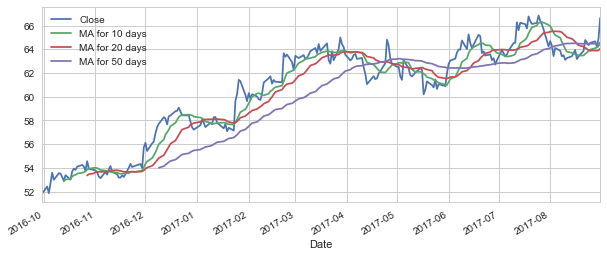

In [58]:
DOW[['Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

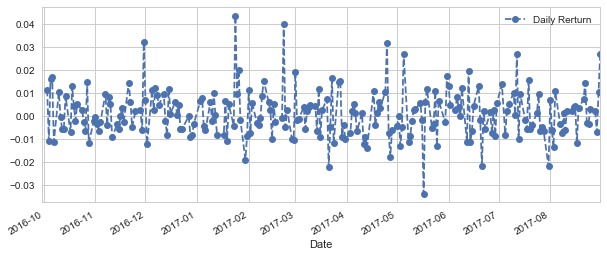

In [59]:
# Dayly return 
DOW['Daily Rerturn'] = DOW['Close'].pct_change()
DOW['Daily Rerturn'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

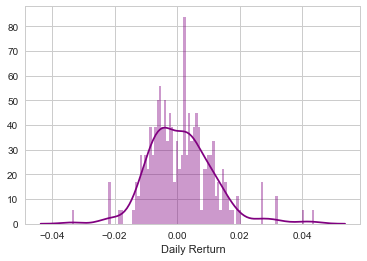

In [60]:
sns.distplot(DOW['Daily Rerturn'].dropna(),bins=100,color='purple')

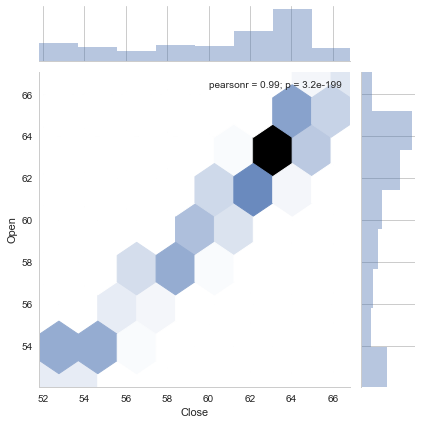

In [61]:
sns.jointplot(DOW['Close'],DOW['Open'],kind='hex')

In [62]:
closing_df = data.DataReader(tickers,'google',start,end)['Close']

In [63]:
closing_df.head()

,AMZN,DOW,GOOG,SPY
Date,,,,
2016-09-30,837.31,51.83,777.29,216.30
2016-10-03,836.74,52.42,772.56,215.78
2016-10-04,834.03,51.86,776.43,214.68
2016-10-05,844.36,52.70,776.47,215.63
2016-10-06,841.66,53.59,776.86,215.78


In [64]:
my_rets = closing_df.pct_change()
my_rets.head()

,AMZN,DOW,GOOG,SPY
Date,,,,
2016-09-30,NaN,NaN,NaN,NaN
2016-10-03,-0.000681,0.011383,-0.006085,-0.002404
2016-10-04,-0.003239,-0.010683,0.005009,-0.005098
2016-10-05,0.012386,0.016197,0.000052,0.004425
2016-10-06,-0.003198,0.016888,0.000502,0.000696


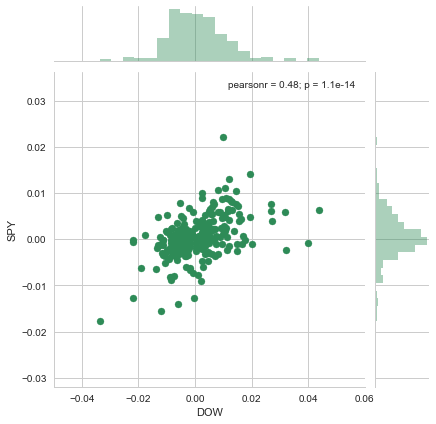

In [65]:
sns.jointplot('DOW','SPY',my_rets,kind = 'scatter',color='seagreen')

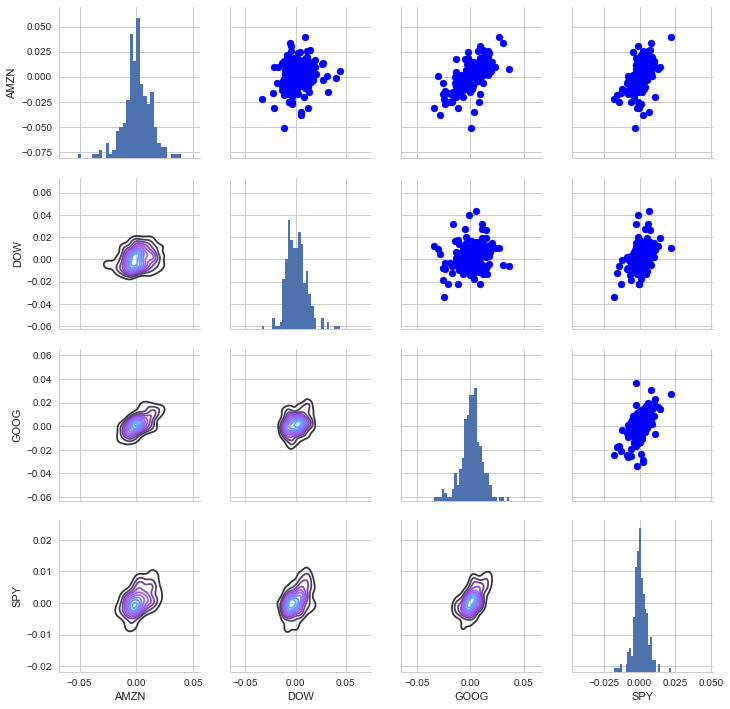

In [66]:
returns_fig = sns.PairGrid(my_rets.dropna())

returns_fig.map_upper(plt.scatter,color='b')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

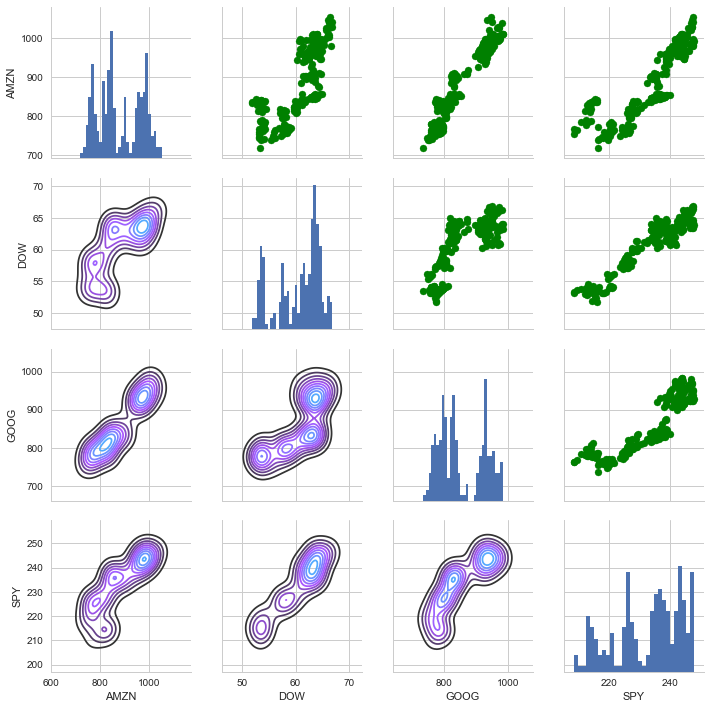

In [67]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='g')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

          AMZN       DOW      GOOG       SPY
AMZN  1.000000  0.199697  0.630151  0.479476
DOW   0.199697  1.000000  0.202716  0.479847
GOOG  0.630151  0.202716  1.000000  0.581240
SPY   0.479476  0.479847  0.581240  1.000000


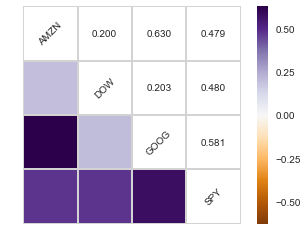

In [68]:
corr = my_rets.dropna().corr()
#sns.heatmap(corr,annot=True)

# Compute the correlation matrix

print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

          AMZN       DOW      GOOG       SPY
AMZN  1.000000  0.770244  0.960922  0.864311
DOW   0.770244  1.000000  0.771997  0.950351
GOOG  0.960922  0.771997  1.000000  0.882228
SPY   0.864311  0.950351  0.882228  1.000000


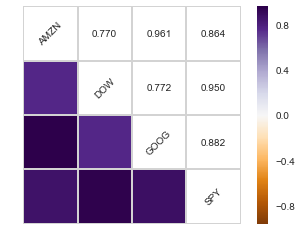

In [69]:
corr = closing_df.corr()

print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

In [70]:
# Analysis risk
rets = my_rets.dropna()

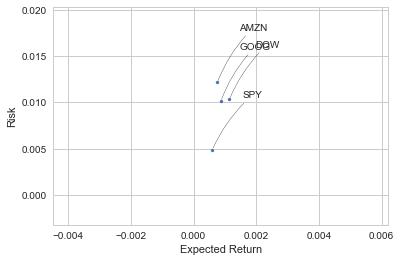

In [71]:
area = np.pi*3

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle= 'arc3,rad=0.11'))

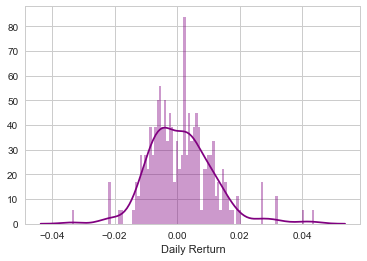

In [72]:
# Value at Risk
sns.distplot(DOW['Daily Rerturn'].dropna(),bins=100,color='purple')

In [73]:
rets['DOW'].quantile(0.05)

-0.012091708236318277

In [74]:
# use monte carlo method
days = 365
dt = 1/days
mu = rets.mean()['DOW']
sigma = rets.std()['DOW']

In [75]:
'''     Browninan motion 
    deta(S)/S = mu*detat(t) + sigma*epsalon*sqrt(delta(t))
    deta(S) = S*(mu*detat(t) + sigma*epsalon*sqrt(delta(t)))'''

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        # epsalone is np.random.normal
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price

In [76]:
DOW.head()

,Open,High,Low,Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Rerturn
Date,,,,,,,,,
2016-09-30,52.04,52.28,51.79,51.83,6649584,NaN,NaN,NaN,NaN
2016-10-03,52.34,52.90,52.14,52.42,7016640,NaN,NaN,NaN,0.011383
2016-10-04,52.47,52.75,51.74,51.86,6884016,NaN,NaN,NaN,-0.010683
2016-10-05,52.03,53.00,51.98,52.70,6365723,NaN,NaN,NaN,0.016197
2016-10-06,52.65,53.61,52.38,53.59,8120744,NaN,NaN,NaN,0.016888


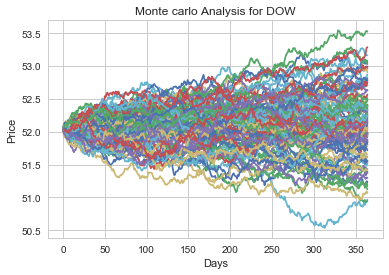

In [77]:
# start at open for first day 
start_price = 52.04

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo Analysis for DOW')

In [78]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]

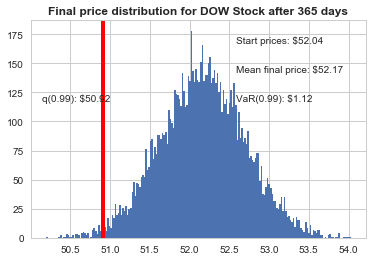

In [79]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

# Start price
plt.figtext(0.6,0.8, s = "Start prices: $%.2f" % start_price)
# mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulation.mean())
# Varianc of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q))
# Disply 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4,color='r')
# Title
plt.title(u"Final price distribution for DOW Stock after %s days" % days, weight='bold')